<a href="https://colab.research.google.com/github/kellyluu94/machine-learning/blob/main/Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
companies = [
    'AMZN',
    'AAPL',
    'GOOGL',
    'META',
    'NFLX'
]

df = yf.download(
    tickers=' '.join(companies),
    period='10y', # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    group_by='ticker'
)

price_to_earnings_ratio = pd.DataFrame([(c, yf.Ticker(c).info['forwardPE']) for c in companies]).sort_values(
    by=1, ascending=True)



[*********************100%***********************]  5 of 5 completed


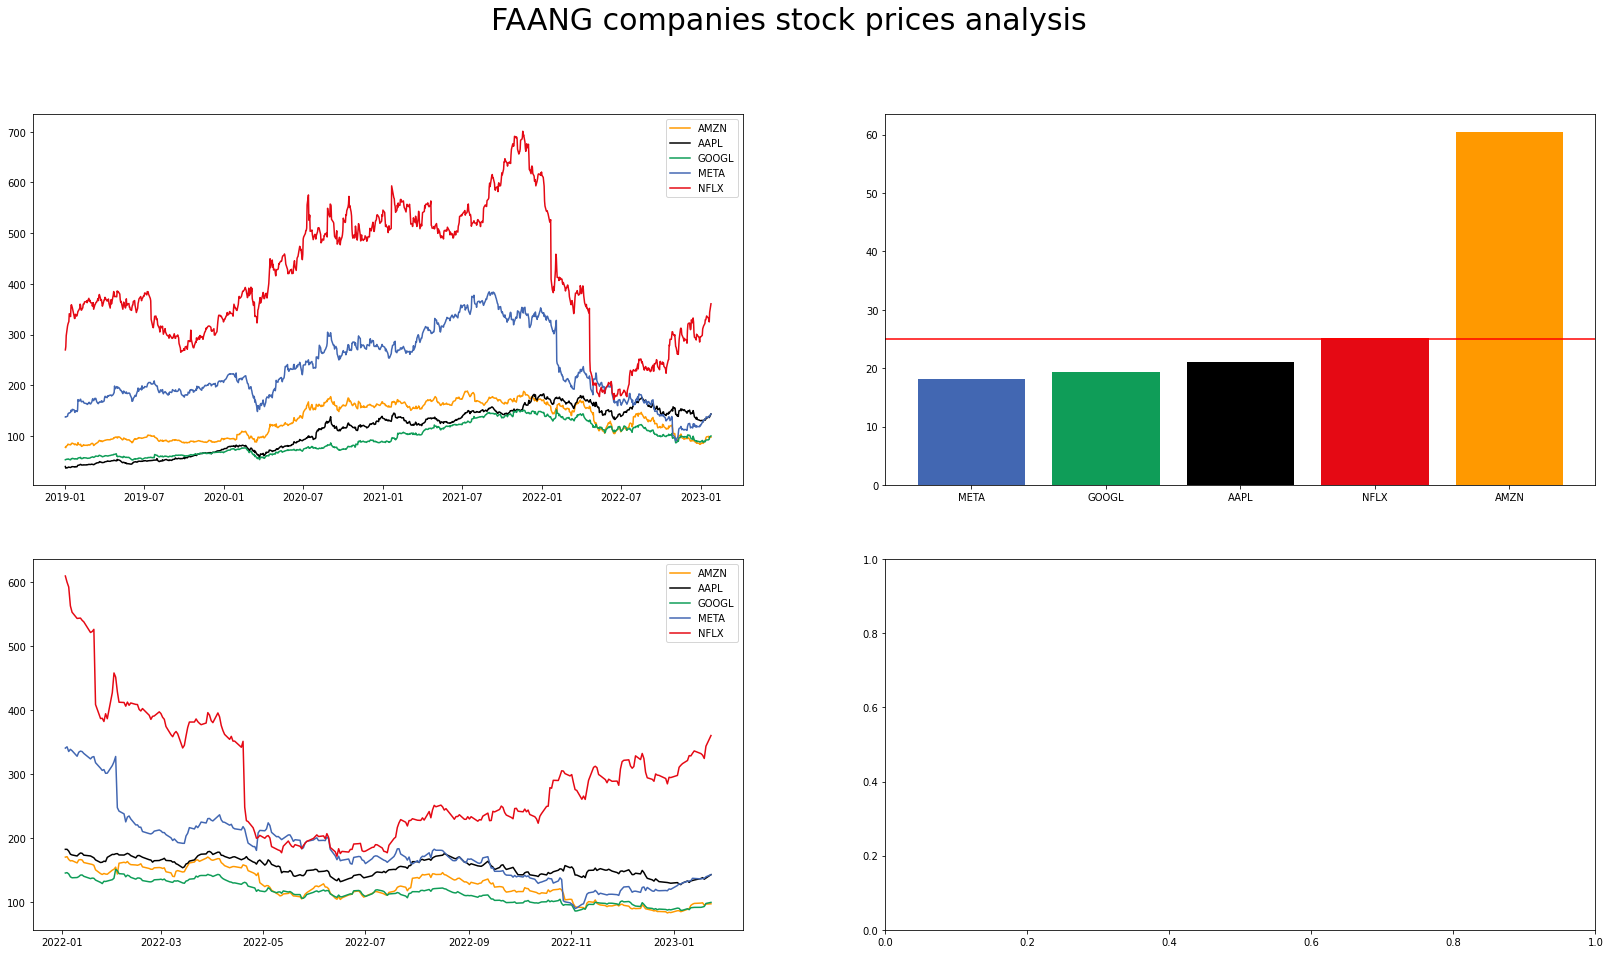

In [21]:
colors = {
    'META': '#4267B2',
    'GOOGL': '#0F9D58',
    'AAPL': '#000000',
    'NFLX': '#E50914',
    'AMZN': '#FF9900'
}

fig, axs = plt.subplots(2, 2, figsize=(28, 15))
fig.suptitle(
    t='FAANG companies stock prices analysis',
    fontsize=30)

# Time series chart
date_values = ['2019-01-01', '2022-01-01']
for i, d in enumerate(date_values):
  for c in companies:
    axs[i][0].plot(df[c]['High'][d:], label=c, color=colors[c])
  axs[i][0].legend()

# Price to earnings ratio
axs[0][1].bar(
    x=price_to_earnings_ratio[0].values,
    height=price_to_earnings_ratio[1].values,
    color=colors.values())
axs[0][1].axhline(25, color='r')


In [20]:
df['GOOGL']['2023-01-01':][['Adj Close']].pct_change()

,Adj Close
Date,
2023-01-03 00:00:00-05:00,NaN
2023-01-04 00:00:00-05:00,-0.011670
2023-01-05 00:00:00-05:00,-0.021344
2023-01-06 00:00:00-05:00,0.013225
2023-01-09 00:00:00-05:00,0.007786
2023-01-10 00:00:00-05:00,0.004544
2023-01-11 00:00:00-05:00,0.035060
2023-01-12 00:00:00-05:00,-0.004261
2023-01-13 00:00:00-05:00,0.010864
